In [1]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:

def decompose(df, column):
    
    invalids = df[column].isna()
    print(f"WARNING: Invalids: {invalids.sum()}, invalids are dropped from the series")
    #df = df.set_index('Date')[column]
    series = df[column].dropna()
    
    # decompose = seasonal_decompose(series, model='additive', extrapolate_trend='freq', period=12)
    seasonal = seasonal_decompose(series, model='additive', extrapolate_trend='freq', period=12).seasonal
    trend = seasonal_decompose(series, model='additive', extrapolate_trend='freq', period=12).trend
    resid = seasonal_decompose(series, model='additive', extrapolate_trend='freq', period=12).resid
    # decompose.plot().show()

    return seasonal, trend, resid


In [4]:
df = pd.read_csv('data/processed/interpolated_and_trends/interpolated_complete_fribourg.csv')
print(df.dtypes)
invalid_dates = df[df['Date'].isna()]
print("Invalid rows:\n", invalid_dates)
# df=df.drop(columns=['Traffic','PM10','NO2','PM2.5'])
df=df.drop(columns=['Traffic','PM10','NO2','O3'])
print(df.columns)
df.columns = ['Date', 'Traffic', 'PM10', 'NO2', 'O3']
# df.columns=['Date', 'Traffic','PM10','NO2','PM2.5']
print(df.columns)

    


Date                     object
Traffic                 float64
PM10                    float64
NO2                     float64
O3                      float64
Traffic_interpolated    float64
PM10_interpolated       float64
O3_interpolated         float64
NO2_interpolated        float64
dtype: object
Invalid rows:
 Empty DataFrame
Columns: [Date, Traffic, PM10, NO2, O3, Traffic_interpolated, PM10_interpolated, O3_interpolated, NO2_interpolated]
Index: []
Index(['Date', 'Traffic_interpolated', 'PM10_interpolated', 'O3_interpolated',
       'NO2_interpolated'],
      dtype='object')
Index(['Date', 'Traffic', 'PM10', 'NO2', 'O3'], dtype='object')


In [5]:
components = {}
for col in df.columns:
    if col != 'Date':  # skip Date column if not already index
        seas, trend, resid = decompose(df, col)
        components[col] = {
            'seasonal': seas,
            'trend': trend,
            'residual': resid
        }


Plotting Traffic trend
Plotting PM10 trend
Plotting NO2 trend
Plotting O3 trend


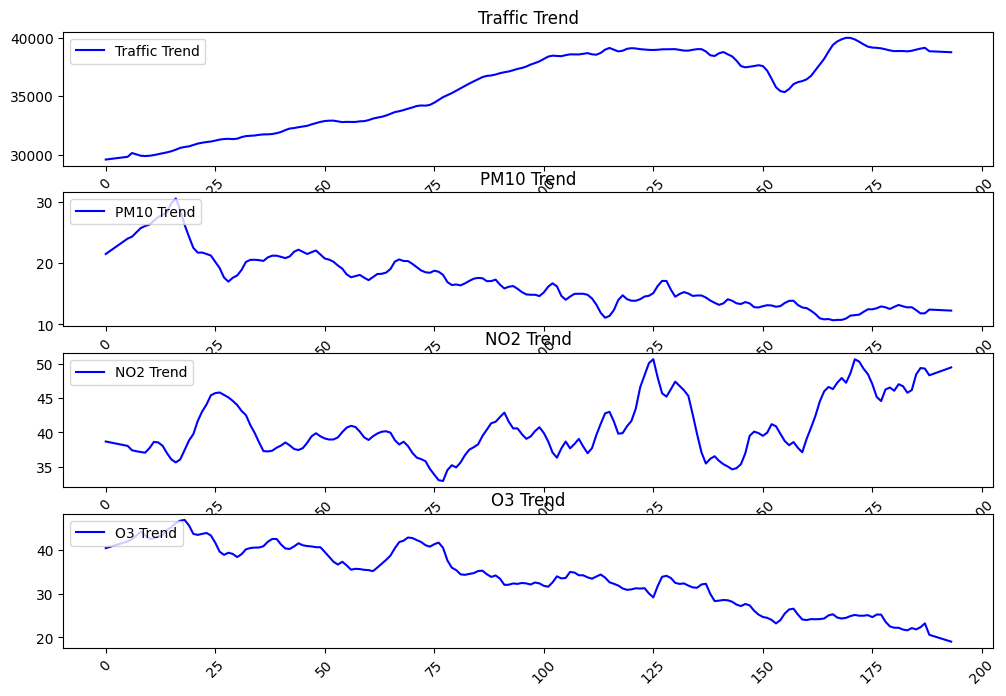

In [6]:
import matplotlib.dates as mdates
# plot trends of each data column
num_plots = len(df.columns) - 1
fig, axes = plt.subplots(num_plots, 1, figsize=(12, num_plots * 2))
# Loop over each column and plot the trend in the corresponding subplot
for idx, col in enumerate(df.columns):
    if col == 'Date':
        continue
    print(f"Plotting {col} trend")
    axes[idx-1].plot(components[col]['trend'].index, components[col]['trend'], label=f'{col} Trend', color='b')
    axes[idx-1].set_title(f'{col} Trend')
    axes[idx-1].legend(loc='upper left')
    axes[idx-1].tick_params(axis='x', rotation=45)

In [36]:
# export trends to csv
df_trends = pd.DataFrame(columns=['Traffic', 'PM10', 'NO2', 'O3'])
# df_trends =pd.DataFrame(columns=['Traffic','PM10','NO2','PM2.5'])
for col in df_trends.columns:
    df_trends[col] = components[col]['trend']
print(df_trends)   


          Traffic       PM10        NO2         O3
0    29610.601095  21.541953  38.670842  40.468724
1    29657.539099  22.045168  38.542318  40.778663
2    29704.477102  22.548382  38.413794  41.088602
3    29751.415105  23.051597  38.285271  41.398541
4    29798.353108  23.554811  38.156747  41.708480
..            ...        ...        ...        ...
189  38815.594618  12.405470  48.582987  20.283898
190  38798.734039  12.372041  48.813802  19.970206
191  38781.873459  12.338612  49.044616  19.656515
192  38765.012880  12.305183  49.275431  19.342823
193  38748.152300  12.271754  49.506245  19.029131

[194 rows x 4 columns]


In [37]:

df_trends.to_csv('data/processed/trends_fribourg.csv', index=False)
